### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import librosa
import os, fnmatch
import matplotlib.pyplot as plt
import seaborn as sns
import json

import tensorflow as tf
from tensorflow import keras
### Use GPU if available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Reading the audio file

In [2]:
n_mfcc = 30

In [3]:
data = pd.read_csv("Features_unclipped.csv")

In [4]:
data['type'].value_counts()

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: type, dtype: int64

### Modelling on Data

In [5]:
X = data.iloc[:, 0:n_mfcc+4]
y = data['type']

In [6]:
y_encoder = LabelEncoder().fit(y)
y = y_encoder.transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31, stratify=y)
print("Train size:",len(X_train), "\nTest size:", len(X_test))

Train size: 468 
Test size: 117


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Classifier

In [9]:
forest = RandomForestClassifier(random_state=31, class_weight='balanced', oob_score=True)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=31)

In [10]:
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9145299145299145

In [11]:
forest.oob_score_

0.9337606837606838

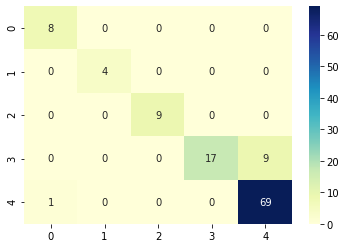

In [12]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")
plt.savefig("Random Forest.jpg")

In [13]:
y_pred = forest.predict(X_test)
print("\nClassification report on test data using Random Forest: \n", classification_report(y_test, y_pred))


Classification report on test data using Random Forest: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       1.00      0.65      0.79        26
           4       0.88      0.99      0.93        70

    accuracy                           0.91       117
   macro avg       0.95      0.93      0.93       117
weighted avg       0.92      0.91      0.91       117



### Gradient Boosting Algorithm

In [14]:
gradient = GradientBoostingClassifier(random_state=31)
gradient.fit(X_train, y_train)

GradientBoostingClassifier(random_state=31)

In [15]:
y_pred = gradient.predict(X_test)
accuracy_score(y_test, y_pred)

0.9829059829059829

In [16]:
y_pred = gradient.predict(X_test)
print("\nClassification report on test data using Gradient Boosting: \n", classification_report(y_test, y_pred))


Classification report on test data using Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         9
           3       0.96      0.96      0.96        26
           4       1.00      1.00      1.00        70

    accuracy                           0.98       117
   macro avg       0.97      0.94      0.95       117
weighted avg       0.98      0.98      0.98       117



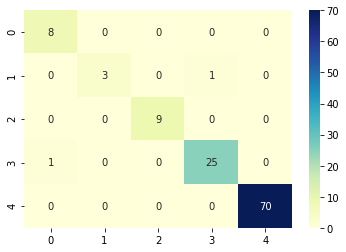

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("Gradient Boosting.jpg")

### Support Vector Classifier

In [18]:
svc = SVC(random_state=9, class_weight='balanced')
svc.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=9)

In [19]:
y_pred = svc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7692307692307693

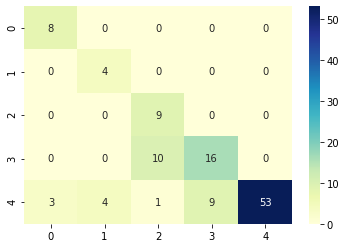

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("Support Vector Classifier.jpg")

In [21]:
y_pred = svc.predict(X_test_scaled)
print("\nClassification report on test data using Support Vector Classifier: \n", classification_report(y_test, y_pred))


Classification report on test data using Support Vector Classifier: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.50      1.00      0.67         4
           2       0.45      1.00      0.62         9
           3       0.64      0.62      0.63        26
           4       1.00      0.76      0.86        70

    accuracy                           0.77       117
   macro avg       0.66      0.87      0.72       117
weighted avg       0.84      0.77      0.78       117



### Gaussian Naive Bayes

In [22]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [23]:
y_pred = gaussian_nb.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8034188034188035

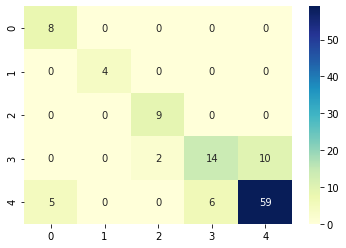

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("Gaussian Naive Bayes.jpg")

In [25]:
y_pred = gaussian_nb.predict(X_test_scaled)
print("\nClassification report on test data using Gaussian Naive Bayes: \n", classification_report(y_test, y_pred))


Classification report on test data using Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      1.00      1.00         4
           2       0.82      1.00      0.90         9
           3       0.70      0.54      0.61        26
           4       0.86      0.84      0.85        70

    accuracy                           0.80       117
   macro avg       0.80      0.88      0.82       117
weighted avg       0.81      0.80      0.80       117



### Multi Layer Perceptron

In [26]:
mlp=MLPClassifier(random_state=9)
mlp.fit(X_train_scaled,y_train)

/home/durgesh/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=9)

In [27]:
y_pred=mlp.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8461538461538461

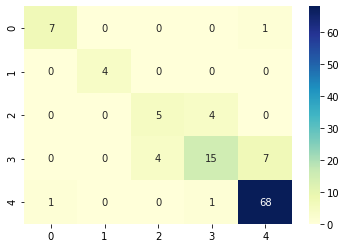

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")
plt.savefig("MLP Classifier.jpg")

In [29]:
y_pred = mlp.predict(X_test_scaled)
print("\nClassification report on test data using Multi Layer Perceptron: \n", classification_report(y_test, y_pred))


Classification report on test data using Multi Layer Perceptron: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      1.00      1.00         4
           2       0.56      0.56      0.56         9
           3       0.75      0.58      0.65        26
           4       0.89      0.97      0.93        70

    accuracy                           0.85       117
   macro avg       0.82      0.80      0.80       117
weighted avg       0.84      0.85      0.84       117



### Stacking Classifier

In [30]:
base_estimators = [
    ("rf", forest),
    ("mlp", mlp),
    ("gba",gradient),
    ("svc",svc),
    ("naive_bayes",gaussian_nb)
]

meta_gradient = GradientBoostingClassifier(random_state=9)

stacking = StackingClassifier(estimators = base_estimators,final_estimator= meta_gradient, cv=5, passthrough=True, n_jobs=4)
stacking.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       oob_score=True,
                                                       random_state=31)),
                               ('mlp', MLPClassifier(random_state=9)),
                               ('gba',
                                GradientBoostingClassifier(random_state=31)),
                               ('svc',
                                SVC(class_weight='balanced', random_state=9)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=GradientBoostingClassifier(random_state=9),
                   n_jobs=4, passthrough=True)

In [31]:
y_pred = stacking.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9914529914529915

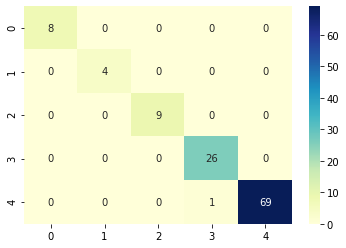

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("Stacking Classifier.jpg")

In [33]:
y_pred = stacking.predict(X_test_scaled)
print("\nClassification report on test data using Stacking Classifier: \n", classification_report(y_test, y_pred))


Classification report on test data using Stacking Classifier: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       0.96      1.00      0.98        26
           4       1.00      0.99      0.99        70

    accuracy                           0.99       117
   macro avg       0.99      1.00      0.99       117
weighted avg       0.99      0.99      0.99       117

